In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

## 1. Chargement des données et Normalisation

In [2]:
# Chargement des données MNIST
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

print('trainset:', X_train.shape) # 60,000 images
print('testset:', X_test.shape) # 10,000 images

# Normalisation des données
X_train = X_train / 255
X_test = X_test / 255

11490434/11490434 [==============================] - 18s 2us/step
trainset: (60000, 28, 28)
testset: (10000, 28, 28)


## 2. Visualisation des données

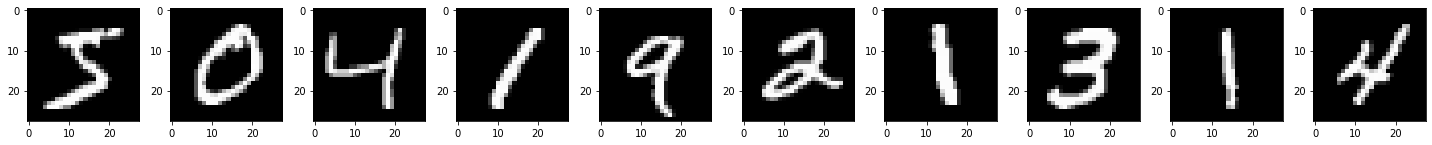

In [3]:
# visualisation de quelques images
fig, ax = plt.subplots(nrows=1, ncols=10, figsize=(20, 4))
for i in range(10):
  ax[i].imshow(X_train[i], cmap='gray')

plt.tight_layout()
plt.show()

## 3. Configuration des Couches du Réseau de Neurones

In [4]:
# Configuration des couches du réseau
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

## 4. Entrainement du Réseau de Neurones

In [5]:
# Compilation du modele
model.compile(optimizer='adam',
              loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Entrainement du modele
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2342 - accuracy: 0.9299
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0961 - accuracy: 0.9699
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0665 - accuracy: 0.9795
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0511 - accuracy: 0.9837
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0410 - accuracy: 0.9865
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0339 - accuracy: 0.9891
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0254 - accuracy: 0.9915
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0242 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0223 - accuracy: 0.9924
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.018

## 5. Évaluation du réseau de neurone sur les données de Test

In [6]:
# Evaluation du modele
test_loss, test_acc = model.evaluate(X_test,  y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.1011 - accuracy: 0.9745
Test accuracy: 0.9745000004768372


## 6. Création d'un modele prédictif

313/313 [==============================] - 2s 5ms/step


Text(0.5, 1.0, '9')

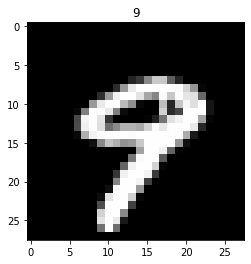

In [16]:
# modele prédictif (softmax)
prediction_model = keras.Sequential([model, keras.layers.Softmax()])
predict_proba = prediction_model.predict(X_test)
predictions = np.argmax(predict_proba, axis=1)



plt.imshow(X_test[9],"gray")
plt.title(predictions[y_test[9]])